In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
df.drop("customerID",axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
ecoder = LabelEncoder()


for col in df.select_dtypes("O").columns:
    df[col] = ecoder.fit_transform(df[col])

In [ ]:
X = df.drop("Churn", axis=1)
y = df.Churn

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

In [ ]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(8278, 19)

# Modeling

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential(name="ANN_Model")
model.add(tf.keras.layers.Dense(2, activation="relu", input_dim=19, name="ANN_1"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", name="ANN_3"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "precision"])

C:\Users\VU360 Solutions\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ANN_1 (Dense)                        │ (None, 2)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_3 (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4930 - loss: 347.2766 - precision: 0.3620 - val_accuracy: 0.5229 - val_loss: 150.5151 - val_precision: 0.4444
Epoch 2/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4958 - loss: 115.9108 - precision: 0.6286 - val_accuracy: 0.5362 - val_loss: 36.5413 - val_precision: 0.6000
Epoch 3/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5067 - loss: 24.5868 - precision: 0.6302 - val_accuracy: 0.5036 - val_loss: 0.7383 - val_precision: 0.4889
Epoch 4/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5370 - loss: 0.7109 - precision: 0.5189 - val_accuracy: 0.5036 - val_loss: 0.7300 - val_precision: 0.4889
Epoch 5/5
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5437 - loss: 0.7009 - precision: 0.5272 - val_accuracy: 0.5036 - val_loss: 0.7208 - val_precision: 0.4889


In [ ]:
import matplotlib.pyplot as plt

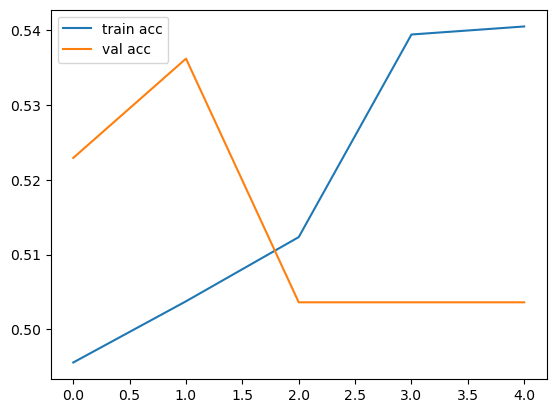

In [ ]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()

In [ ]:
pred = model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
pred = pred[:, 0]

In [ ]:
class_pred = []
for val in pred:
    if val > 0.5:
        class_pred.append(1)
    else:
        class_pred.append(0)

In [ ]:
y_pred = class_pred

In [ ]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy :  0.5318840579710145
--------------------------------------------------
F1 :  [0.17391304 0.67340748]
--------------------------------------------------
Reacll :  [0.09779482 0.97273612]
--------------------------------------------------
Precision :  [0.78461538 0.51494845]
--------------------------------------------------
Confusion Matrix....
 [[102 941]
 [ 28 999]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.78      0.10      0.17      1043
           1       0.51      0.97      0.67      1027

    accuracy                           0.53      2070
   macro avg       0.65      0.54      0.42      2070
weighted avg       0.65      0.53      0.42      2070

--------------------------------------------------
Plotting Confusion Matrix...



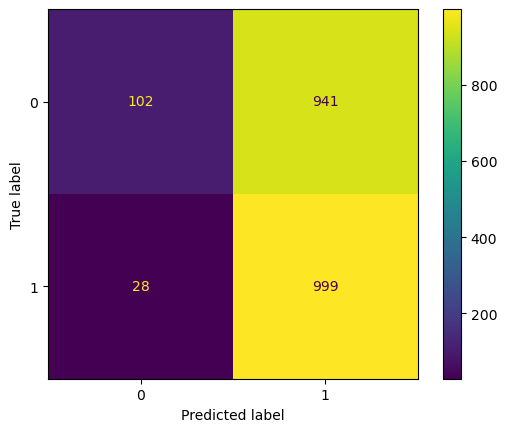

In [ ]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=None)
disp.plot()
plt.show()